# Demo

Demo showing sample usage of SOM class

In [1]:
from SOM import SOM
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## MNIST

In [17]:
X, y = digits = load_digits(return_X_y=True)

In [18]:
X /= np.max(X)

In [19]:
p = np.random.permutation(X.shape[0])
X, y = X[p, :], y[p]

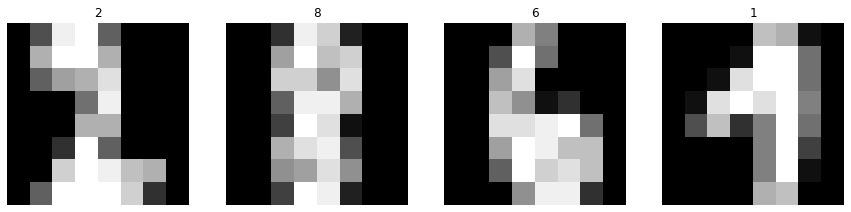

In [35]:
fig, axs = plt.subplots(1, 4, figsize=(15, 15))
idxs = np.random.choice(X.shape[0], size=axs.shape[0], replace=False)
for i in range(axs.shape[0]):
    axs[i].imshow(X[idxs[i], :].reshape(8, 8), cmap="gray")
    axs[i].set_title(y[idxs[i]])
    axs[i].axis("off")
plt.show()

In [7]:
som = SOM(10, 10, 
          epochs=120, 
          learning_rate_start=1, 
          learning_rate_end=0.1, 
          neighbourhood_rate_start=3, 
          neighbourhood_rate_end=1,
          neighbourhood_func="gaussian",
          grid_type="rect")
som.fit(X, y)

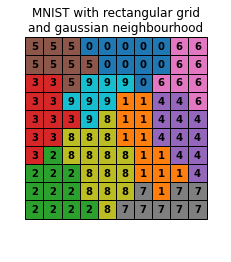

In [10]:
som.plot("MNIST with rectangular grid\nand gaussian neighbourhood")

In [33]:
som = SOM(10, 10, 
          epochs=100, 
          learning_rate_start=1, 
          learning_rate_end=0.1, 
          neighbourhood_rate_start=2, 
          neighbourhood_rate_end=1,
          neighbourhood_func="gaussian")
som.fit(X, y)

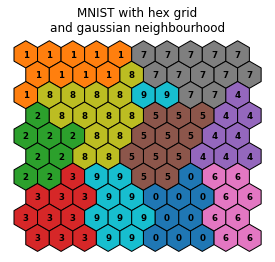

In [34]:
som.plot("MNIST with hex grid\nand gaussian neighbourhood")

In [42]:
som = SOM(13, 10, 
          epochs=150, 
          learning_rate_start=0.001, 
          learning_rate_end=0.00001, 
          neighbourhood_rate_start=4, 
          neighbourhood_rate_end=3,
          neighbourhood_func="mexican_hat")
som.fit(X, y)

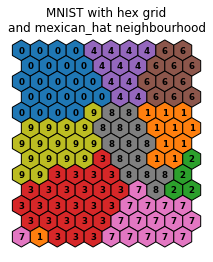

In [43]:
som.plot("MNIST with hex grid\nand mexican_hat neighbourhood")
# surprisingly did not find any of "5" class 

## Human activity

In [2]:
df = pd.read_csv("data/human_activity.csv")
df.shape

(10299, 564)

In [3]:
df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
# drop human id and enumerated activity
df = df.drop(columns=["subject", "Activity"])
X, y = df.drop(columns="ActivityName").to_numpy(), df["ActivityName"].to_numpy()
# use train test split to get stratified subsample of data
X, _, y, _ = train_test_split(X, y, test_size=0.75, shuffle=True, stratify=y, random_state=32)
# reduce dimensionality
X = PCA(n_components=60).fit_transform(X)
X.shape

(2574, 60)

In [5]:
som = SOM(16, 16,
          epochs=10,
          learning_rate_start=3,
          learning_rate_end=0.5,
          neighbourhood_rate_start=2, 
          neighbourhood_rate_end=1,
          neighbourhood_func="gaussian",
          grid_type="hex")
som.fit(X, y)

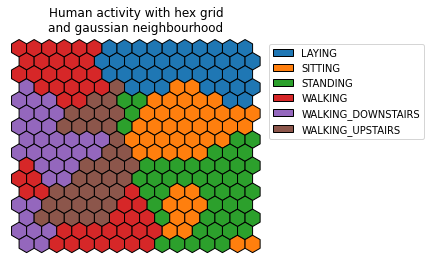

In [6]:
som.plot(legend=True, title="Human activity with hex grid\nand gaussian neighbourhood")
# predictably, laying is found no problem, 
# sitting and standing are mixed
# same for walking straight, walking up/downstairs

In [5]:
X, y = df.drop(columns="ActivityName").to_numpy(), df["ActivityName"].to_numpy()
X = PCA(n_components=60).fit_transform(X)

In [10]:
som = SOM(16, 16,
          epochs=10,
          learning_rate_start=3,
          learning_rate_end=0.5,
          neighbourhood_rate_start=2, 
          neighbourhood_rate_end=1,
          neighbourhood_func="gaussian",
          grid_type="hex",
          bootstrap=0.15)
som.fit(X, y)

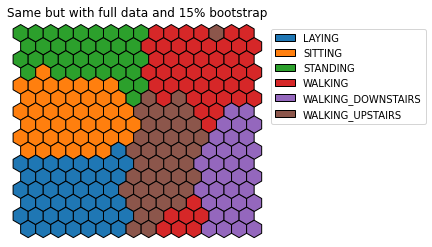

In [15]:
som.plot(legend=True, title="Same but with full data and 15% bootstrap")